# TRANSFORM DOMAIN

Details in images are generally found in
* high frequencies
* very rapid alterations of dark and brigh areas

One of the possibilities to determine how much detail we want in a picture is to change the domain of analysis.

To move from the spatial domain (pixels) to the frequency domain we use **transforms**.

A transform is a class of unary matrices that are used to represent signals

* A 1-D signal can be expressed as the combination of a number of orthonormal basis functions

* A 2-D signal can be expressed as the combination of a number of basis matrices called basis images

In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

if not os.path.isfile('lena.bmp'):
    !wget -O lena.bmp "https://drive.google.com/uc?export=download&id=15o8_ABAaQA_7s5eGhqtEymDSPa_rPt6P"

im = cv2.imread('../Images/lena.bmp', 0)
im1 = np.float32(im) / 255.0

--2021-09-22 09:36:24--  https://drive.google.com/uc?export=download&id=15o8_ABAaQA_7s5eGhqtEymDSPa_rPt6P
Resolving drive.google.com (drive.google.com)... 74.125.141.138, 74.125.141.102, 74.125.141.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mvn90029a9gov1ml27v91lhardl1pquo/1632303375000/05147498317285990661/*/15o8_ABAaQA_7s5eGhqtEymDSPa_rPt6P?e=download [following]
--2021-09-22 09:36:24--  https://doc-0g-9g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mvn90029a9gov1ml27v91lhardl1pquo/1632303375000/05147498317285990661/*/15o8_ABAaQA_7s5eGhqtEymDSPa_rPt6P?e=download
Resolving doc-0g-9g-docs.googleusercontent.com (doc-0g-9g-docs.googleusercontent.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to doc-0g-9g-docs.googleusercontent.com (doc-0g

## Fourier Transform

The Fourier transform decomposes a function of time (a signal) into its constituent frequencies.

Most of the Fourier transform is concentrated in the center (low frequencies).

Deleting the central frequencies saves a lot of data and does not affect too much the image.

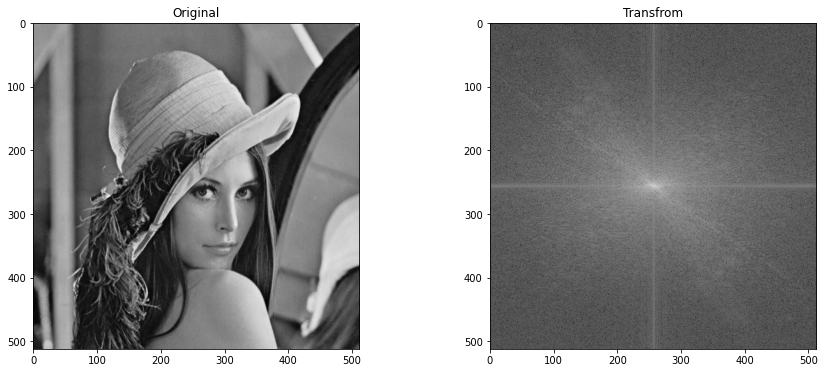

In [2]:
transform = np.fft.fftshift(np.fft.fft2(im))

# Show orginal and edited images side by side
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.title('Transfrom')
plt.imshow(np.log(abs(transform)), cmap='gray')
plt.show()

## Discrete Cosine Transform

The Discrete Cosine Transform (DCT) has many advantages:

* it is real and orthgonal: the inverse matrix corresponds to the transposed matrix

* it is fast

* it allows an optimal energy allocation if data is correlated



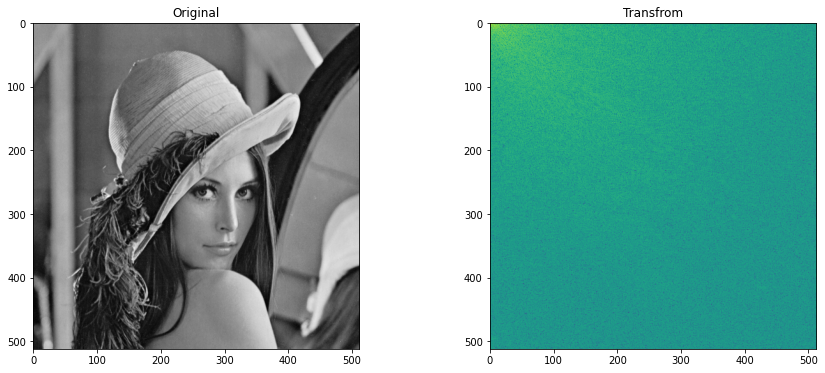

In [3]:
from scipy.fft import dct, idct

transform = dct(dct(im, axis=0, norm='ortho'), axis=1, norm='ortho')

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.title('Transfrom')
plt.imshow(np.log(abs(transform)))
plt.show()

Exercises:
* remove the DC component
* remove low and high frequencies

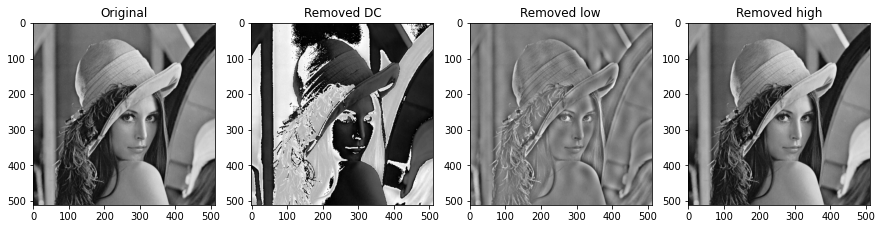

In [6]:
# remove DC frequencies
edited1 = transform.copy()
edited1[0, 0] = 0
edited1 = np.uint8(idct(idct(edited1, axis=1, norm='ortho'), axis=0, norm='ortho'))

# remove low freqs
edited2 = transform.copy()
edited2[:20, :20] = 0
edited2[0, 0] = transform[0, 0]
edited2 = np.uint8(idct(idct(edited2, axis=1, norm='ortho'), axis=0, norm='ortho'))

# remove high freqs
edited3 = transform.copy()
edited3[512 - 20:, 512 - 20:] = 0
edited3 = np.uint8(idct(idct(edited3, axis=1, norm='ortho'), axis=0, norm='ortho'))

plt.figure(figsize=(15, 9))
plt.subplot(141)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(142)
plt.title('Removed DC')
plt.imshow(edited1, cmap='gray')
plt.subplot(143)
plt.title('Removed low')
plt.imshow(edited2, cmap='gray')
plt.subplot(144)
plt.title('Removed high')
plt.imshow(edited3, cmap='gray')
plt.show()

## Wavelet transform

The Wavelet transform can either be **continuous** or **discrete**. For images we typically use the Discrete Wavelt Transform (DWT), which uses differnt filters to analyse the signal at different levels:

* high-pass filters to analyse high frequencies
* low-pass filters to analyse low frequencies

The main properties of DWT are
* it is real, multiscale and multiresolution
* depending on the chosen basis function it is possible to obtain a high energy reduction
* it is well suited to represent the Human Visual System (HVS) thanks to its multiresolution properties

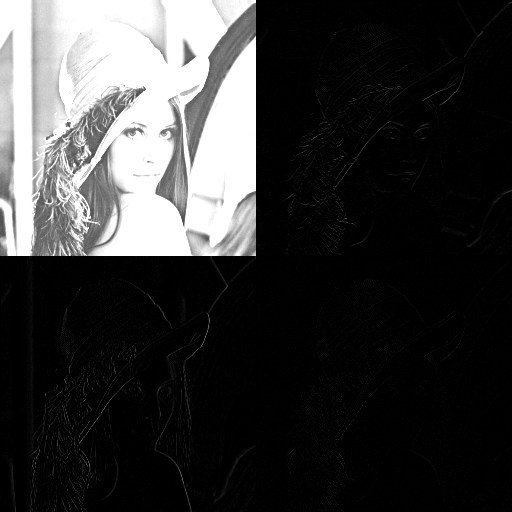

In [ ]:
import pywt

# from google.colab.patches import cv2_imshow

coeffs2 = pywt.dwt2(im, 'haar')
LL, (LH, HL, HH) = coeffs2

# Show components
blank_image = np.zeros((512, 512), np.float32)
blank_image[:256, :256] = LL
blank_image[:256, 256:] = LH
blank_image[256:, :256] = HL
blank_image[256:, 256:] = HH

# cv2_imshow(blank_image)
cv2.imshow("Image", blank_image)

Exercises:
* remove each subband and see what happens
* visualize the second level decomposition

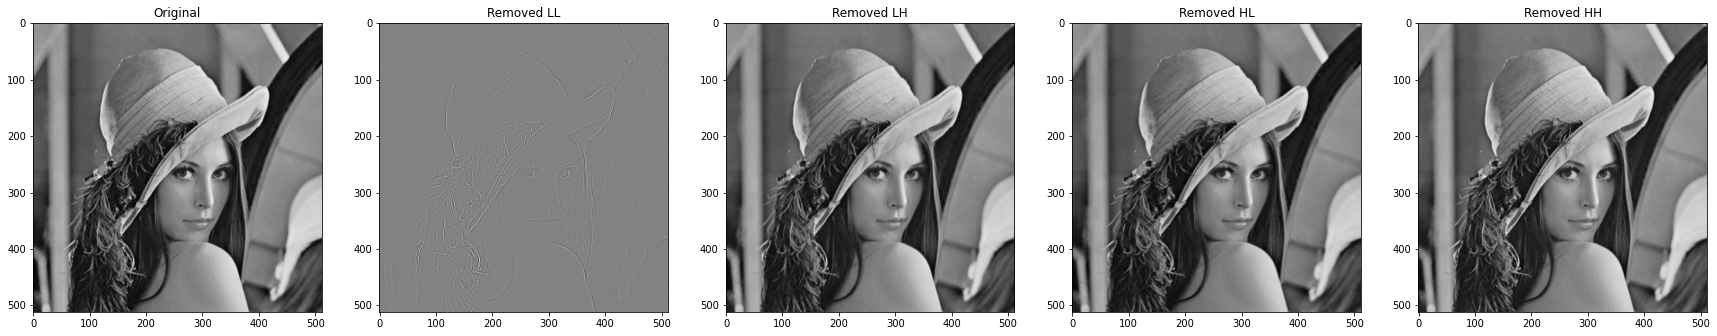

In [ ]:
LL_edited = LL.copy()
LL_edited[:, :] = 0
LL_res = pywt.idwt2((LL_edited, (LH, HL, HH)), 'haar')

LH_edited = LH.copy()
LH_edited[:, :] = 0
LH_res = pywt.idwt2((LL, (LH_edited, HL, HH)), 'haar')

HL_edited = HL.copy()
HL_edited[:, :] = 0
HL_res = pywt.idwt2((LL, (LH, HL_edited, HH)), 'haar')

HH_edited = HH.copy()
HH_edited[:, :] = 0
HH_res = pywt.idwt2((LL, (LH, HL, HH_edited)), 'haar')

# Show components
plt.figure(figsize=(30, 15))
plt.subplot(151)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(152)
plt.title('Removed LL')
plt.imshow(LL_res, cmap='gray')
plt.subplot(153)
plt.title('Removed LH')
plt.imshow(LH_res, cmap='gray')
plt.subplot(154)
plt.title('Removed HL')
plt.imshow(HL_res, cmap='gray')
plt.subplot(155)
plt.title('Removed HH')
plt.imshow(HH_res, cmap='gray')
plt.show()


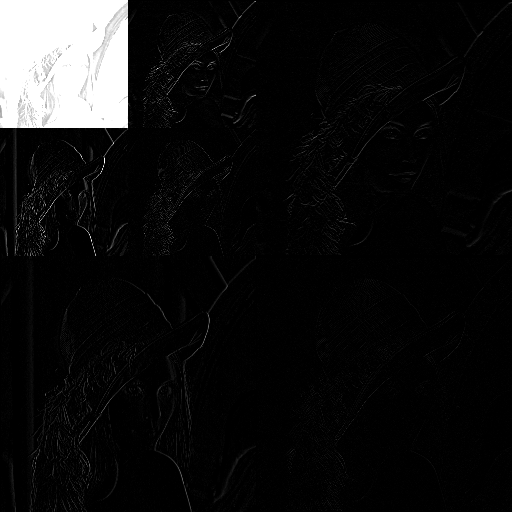

In [ ]:
import pywt

coeffs2_2 = pywt.dwt2(LL, 'haar')
LL2, (LH2, HL2, HH2) = coeffs2_2

blank_image = np.zeros((512, 512), np.float32)
blank_image[:128, :128] = LL2
blank_image[:128, 128:256] = LH2
blank_image[128:256, :128] = HL2
blank_image[128:256, 128:256] = HH2
blank_image[:256, 256:] = LH
blank_image[256:, :256] = HL
blank_image[256:, 256:] = HH

# Show components
# cv2_imshow(blank_image)
cv2.imshow("Image", blank_image)